<a href="https://colab.research.google.com/github/RonitShetty/Hyper-parameter-tuning-IMDB-dataset/blob/main/HyperParameterTuningIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roll No: C070

Name: Ronit Shetty

Aim : Hyper parameter tuning


In [2]:
# =============================================================================
# TASK 1: Import the IMDB data or any other suitable dataset
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("TensorFlow version:", tf.__version__)

# Load the IMDB dataset (top 10,000 most frequent words)
vocab_size = 10000
max_length = 500

(X_train_full, y_train_full), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training samples: {len(X_train_full)}")
print(f"Test samples: {len(X_test)}")
print(f"Sample review length: {len(X_train_full[0])}")
print(f"Sample label: {y_train_full[0]} (0=Negative, 1=Positive)")

TensorFlow version: 2.19.0
Training samples: 25000
Test samples: 25000
Sample review length: 218
Sample label: 1 (0=Negative, 1=Positive)


In [3]:
# =============================================================================
# TASK 2: Pre-processing and prepare the data for giving to the neural network
# a. Split it into train and test
# b. Set aside validation data from the training set
# =============================================================================

# Pad sequences to make them uniform length
X_train_full = pad_sequences(X_train_full, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

print(f"Padded training data shape: {X_train_full.shape}")
print(f"Padded test data shape: {X_test.shape}")

# Task 2a & 2b: Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Display class distribution
print(f"\nClass distribution:")
print(f"Train - Positive: {np.sum(y_train)}, Negative: {len(y_train) - np.sum(y_train)}")
print(f"Val - Positive: {np.sum(y_val)}, Negative: {len(y_val) - np.sum(y_val)}")
print(f"Test - Positive: {np.sum(y_test)}, Negative: {len(y_test) - np.sum(y_test)}")

Padded training data shape: (25000, 500)
Padded test data shape: (25000, 500)

Data split:
Training set: 20000 samples
Validation set: 5000 samples
Test set: 25000 samples

Class distribution:
Train - Positive: 10000, Negative: 10000
Val - Positive: 2500, Negative: 2500
Test - Positive: 12500, Negative: 12500


In [4]:
# =============================================================================
# TASK 3: Building the sequential neural network model
# a. You may choose the layers
# b. Use appropriate activation and loss functions
# =============================================================================

def create_model(vocab_size, max_length, embedding_dim=128):
    """
    Create a sequential neural network for sentiment analysis
    """
    model = models.Sequential([
        # Embedding layer - converts word indices to dense vectors
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

        # Global average pooling to reduce dimensionality
        layers.GlobalAveragePooling1D(),

        # Dense hidden layers with ReLU activation
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),

        # Output layer for binary classification with sigmoid activation
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create the model
model = create_model(vocab_size, max_length)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# =============================================================================
# TASK 4: Compile and fit the model to the training dataset. Use validation also.
# =============================================================================

# Compile the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Appropriate for binary classification
    metrics=['accuracy']
)

# Train the model with validation data
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

print("Model training completed!")

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.5361 - loss: 0.6815 - val_accuracy: 0.7344 - val_loss: 0.4955
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7959 - loss: 0.4402 - val_accuracy: 0.8436 - val_loss: 0.3492
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.8660 - loss: 0.3143 - val_accuracy: 0.8452 - val_loss: 0.3394
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8814 - loss: 0.2836 - val_accuracy: 0.8770 - val_loss: 0.2950
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8965 - loss: 0.2476 - val_accuracy: 0.8834 - val_loss: 0.2900
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8825 - loss: 0.2753 - val_accuracy: 0.8608 - val_loss: 0.3275
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9108 - loss: 0.2196 - val_accuracy: 0.8532 - val_loss: 0.3627
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9111 - loss: 0.2140 - 

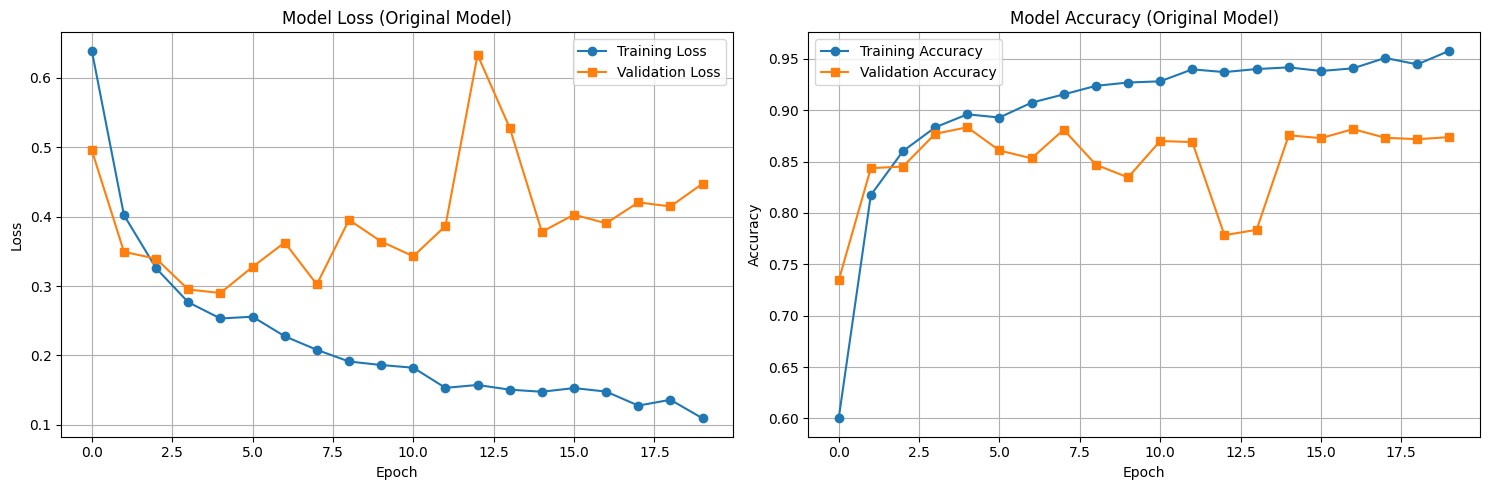


Original Model Performance:
Training Accuracy: 0.9719
Validation Accuracy: 0.8738
Test Accuracy: 0.8659


In [6]:
# =============================================================================
# TASK 5: Plot training and validation loss
# =============================================================================

def plot_training_history(history, title_suffix=""):
    """Plot training and validation loss and accuracy"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss', marker='o')
    ax1.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    ax1.set_title(f'Model Loss{title_suffix}')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    ax2.set_title(f'Model Accuracy{title_suffix}')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history, " (Original Model)")

# Evaluate original model performance
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\nOriginal Model Performance:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training regularized model...
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.5099 - loss: 1.0178 - val_accuracy: 0.5140 - val_loss: 0.8179 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7298 - loss: 0.6437 - val_accuracy: 0.8468 - val_loss: 0.4535 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.8634 - loss: 0.4176 - val_accuracy: 0.8532 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8900 - loss: 0.3414 - val_accuracy: 0.8576 - val_loss: 0.3772 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9008 - loss: 0.3038 - val_accuracy: 0.8384 - val_loss: 0.4181 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9098 - loss: 0.2719 - val_accuracy: 0.8596 - val_loss: 0.3731 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25

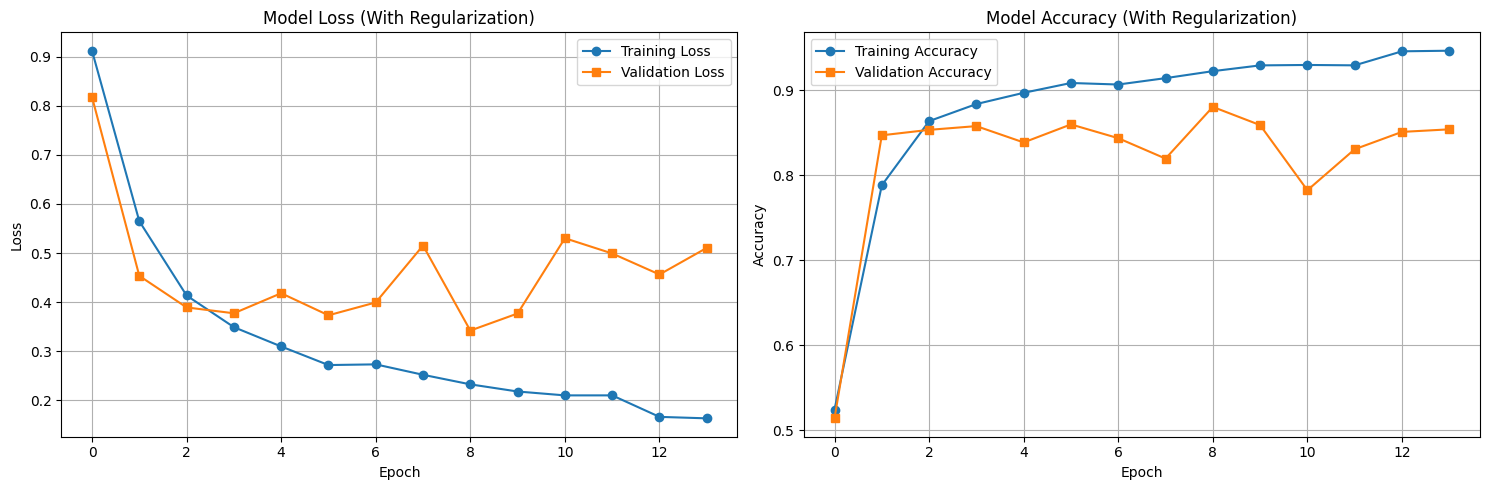

In [7]:
# =============================================================================
# TASK 6: Use regularizers to improve the performance
# =============================================================================

def create_regularized_model(vocab_size, max_length, embedding_dim=128):
    """
    Create a regularized neural network model with dropout, L2 regularization, and batch normalization
    """
    model = models.Sequential([
        # Embedding layer
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),

        # Global average pooling
        layers.GlobalAveragePooling1D(),

        # Regularized dense layers with L2 regularization, dropout, and batch normalization
        layers.Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.BatchNormalization(),

        layers.Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.4),
        layers.BatchNormalization(),

        layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),

        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create regularized model
regularized_model = create_regularized_model(vocab_size, max_length)
regularized_model.summary()

# Compile regularized model
regularized_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Add callbacks for better training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

# Train regularized model
print("Training regularized model...")
regularized_history = regularized_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plot regularized model performance
plot_training_history(regularized_history, " (With Regularization)")

In [8]:
# =============================================================================
# TASK 7: Record the best performance
# =============================================================================

# Evaluate both models
print("=" * 60)
print("FINAL PERFORMANCE COMPARISON")
print("=" * 60)

# Original model performance
orig_train_loss, orig_train_acc = model.evaluate(X_train, y_train, verbose=0)
orig_val_loss, orig_val_acc = model.evaluate(X_val, y_val, verbose=0)
orig_test_loss, orig_test_acc = model.evaluate(X_test, y_test, verbose=0)

# Regularized model performance
reg_train_loss, reg_train_acc = regularized_model.evaluate(X_train, y_train, verbose=0)
reg_val_loss, reg_val_acc = regularized_model.evaluate(X_val, y_val, verbose=0)
reg_test_loss, reg_test_acc = regularized_model.evaluate(X_test, y_test, verbose=0)

# Create detailed comparison table
print("\nDETAILED PERFORMANCE COMPARISON:")
print("-" * 70)
print(f"{'Metric':<20} {'Original':<12} {'Regularized':<12} {'Improvement':<12}")
print("-" * 70)
print(f"{'Training Acc':<20} {orig_train_acc:<12.4f} {reg_train_acc:<12.4f} {reg_train_acc-orig_train_acc:<12.4f}")
print(f"{'Validation Acc':<20} {orig_val_acc:<12.4f} {reg_val_acc:<12.4f} {reg_val_acc-orig_val_acc:<12.4f}")
print(f"{'Test Acc':<20} {orig_test_acc:<12.4f} {reg_test_acc:<12.4f} {reg_test_acc-orig_test_acc:<12.4f}")
print(f"{'Training Loss':<20} {orig_train_loss:<12.4f} {reg_train_loss:<12.4f} {orig_train_loss-reg_train_loss:<12.4f}")
print(f"{'Validation Loss':<20} {orig_val_loss:<12.4f} {reg_val_loss:<12.4f} {orig_val_loss-reg_val_loss:<12.4f}")
print(f"{'Test Loss':<20} {orig_test_loss:<12.4f} {reg_test_loss:<12.4f} {orig_test_loss-reg_test_loss:<12.4f}")

# Determine and record best model
if reg_test_acc > orig_test_acc:
    best_model = "Regularized Model"
    best_accuracy = reg_test_acc
    best_loss = reg_test_loss
else:
    best_model = "Original Model"
    best_accuracy = orig_test_acc
    best_loss = orig_test_loss

print(f"\n BEST PERFORMING MODEL: {best_model}")
print(f" Best Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f" Best Test Loss: {best_loss:.4f}")

# Show sample predictions
print(f"\n SAMPLE PREDICTIONS FROM BEST MODEL:")
sample_indices = np.random.choice(len(X_test), 5)
if best_model == "Regularized Model":
    predictions = regularized_model.predict(X_test[sample_indices])
else:
    predictions = model.predict(X_test[sample_indices])

for i, idx in enumerate(sample_indices):
    prob = predictions[i][0]
    pred_label = "Positive" if prob > 0.5 else "Negative"
    true_label = "Positive" if y_test[idx] == 1 else "Negative"
    confidence = prob if prob > 0.5 else 1 - prob

    print(f"Sample {i+1}: Predicted: {pred_label} ({confidence:.3f}) | True: {true_label}")

FINAL PERFORMANCE COMPARISON

DETAILED PERFORMANCE COMPARISON:
----------------------------------------------------------------------
Metric               Original     Regularized  Improvement 
----------------------------------------------------------------------
Training Acc         0.9719       0.9675       -0.0044     
Validation Acc       0.8738       0.8802       0.0064      
Test Acc             0.8659       0.8718       0.0058      
Training Loss        0.0776       0.1324       -0.0548     
Validation Loss      0.4475       0.3420       0.1055      
Test Loss            0.4943       0.3663       0.1279      

 BEST PERFORMING MODEL: Regularized Model
 Best Test Accuracy: 0.8718 (87.18%)
 Best Test Loss: 0.3663

 SAMPLE PREDICTIONS FROM BEST MODEL:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Sample 1: Predicted: Positive (0.831) | True: Positive
Sample 2: Predicted: Positive (0.992) | True: Positive
Sample 3: Predicted: Positive (0.996) | True: Positive
Sample 4: Predicted: Negative